In [3]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import matplotlib.pyplot as plt
import emoji
from collections import Counter
import plotly.graph_objs as go
from plotly.offline import iplot
import os
import plotly.express as px
import string
import glob

In [4]:
glob.glob(r'/Users/viveksasidharan/code/Documents/GitHub/S%26P_resources/individual_stocks_5yr/*csv')

['/Users/viveksasidharan/code/Documents/GitHub/S%26P_resources/individual_stocks_5yr/XRX_data.csv',
 '/Users/viveksasidharan/code/Documents/GitHub/S%26P_resources/individual_stocks_5yr/GS_data.csv',
 '/Users/viveksasidharan/code/Documents/GitHub/S%26P_resources/individual_stocks_5yr/SPGI_data.csv',
 '/Users/viveksasidharan/code/Documents/GitHub/S%26P_resources/individual_stocks_5yr/MTB_data.csv',
 '/Users/viveksasidharan/code/Documents/GitHub/S%26P_resources/individual_stocks_5yr/V_data.csv',
 '/Users/viveksasidharan/code/Documents/GitHub/S%26P_resources/individual_stocks_5yr/CTAS_data.csv',
 '/Users/viveksasidharan/code/Documents/GitHub/S%26P_resources/individual_stocks_5yr/ESRX_data.csv',
 '/Users/viveksasidharan/code/Documents/GitHub/S%26P_resources/individual_stocks_5yr/APH_data.csv',
 '/Users/viveksasidharan/code/Documents/GitHub/S%26P_resources/individual_stocks_5yr/BBT_data.csv',
 '/Users/viveksasidharan/code/Documents/GitHub/S%26P_resources/individual_stocks_5yr/RHI_data.csv',


In [5]:
len(glob.glob(r'/Users/viveksasidharan/code/Documents/GitHub/S%26P_resources/individual_stocks_5yr/*csv'))

505

In [6]:
df_company_list =  [r'/Users/viveksasidharan/code/Documents/GitHub/S%26P_resources/individual_stocks_5yr/AAPL_data.csv' ,
                    r'/Users/viveksasidharan/code/Documents/GitHub/S%26P_resources/individual_stocks_5yr/AMZN_data.csv' ,
                    r'/Users/viveksasidharan/code/Documents/GitHub/S%26P_resources/individual_stocks_5yr/GOOG_data.csv' ,
                    r'/Users/viveksasidharan/code/Documents/GitHub/S%26P_resources/individual_stocks_5yr/MSFT_data.csv'
                    ]

In [8]:
df_data = pd.DataFrame()
for file in df_company_list:
    df_current = pd.read_csv(file)
    df_data = pd.concat([df_data, df_current], ignore_index=True)

In [9]:
df_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [10]:
df_data.shape

(4752, 7)

In [12]:
df_data['Name'].unique()

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

Stock price change over time

In [15]:
df_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [13]:
df_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [14]:
df_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [16]:
df_data['date'] = pd.to_datetime(df_data['date'])

In [17]:
df_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [18]:
df_name_list = df_data['Name'].unique()

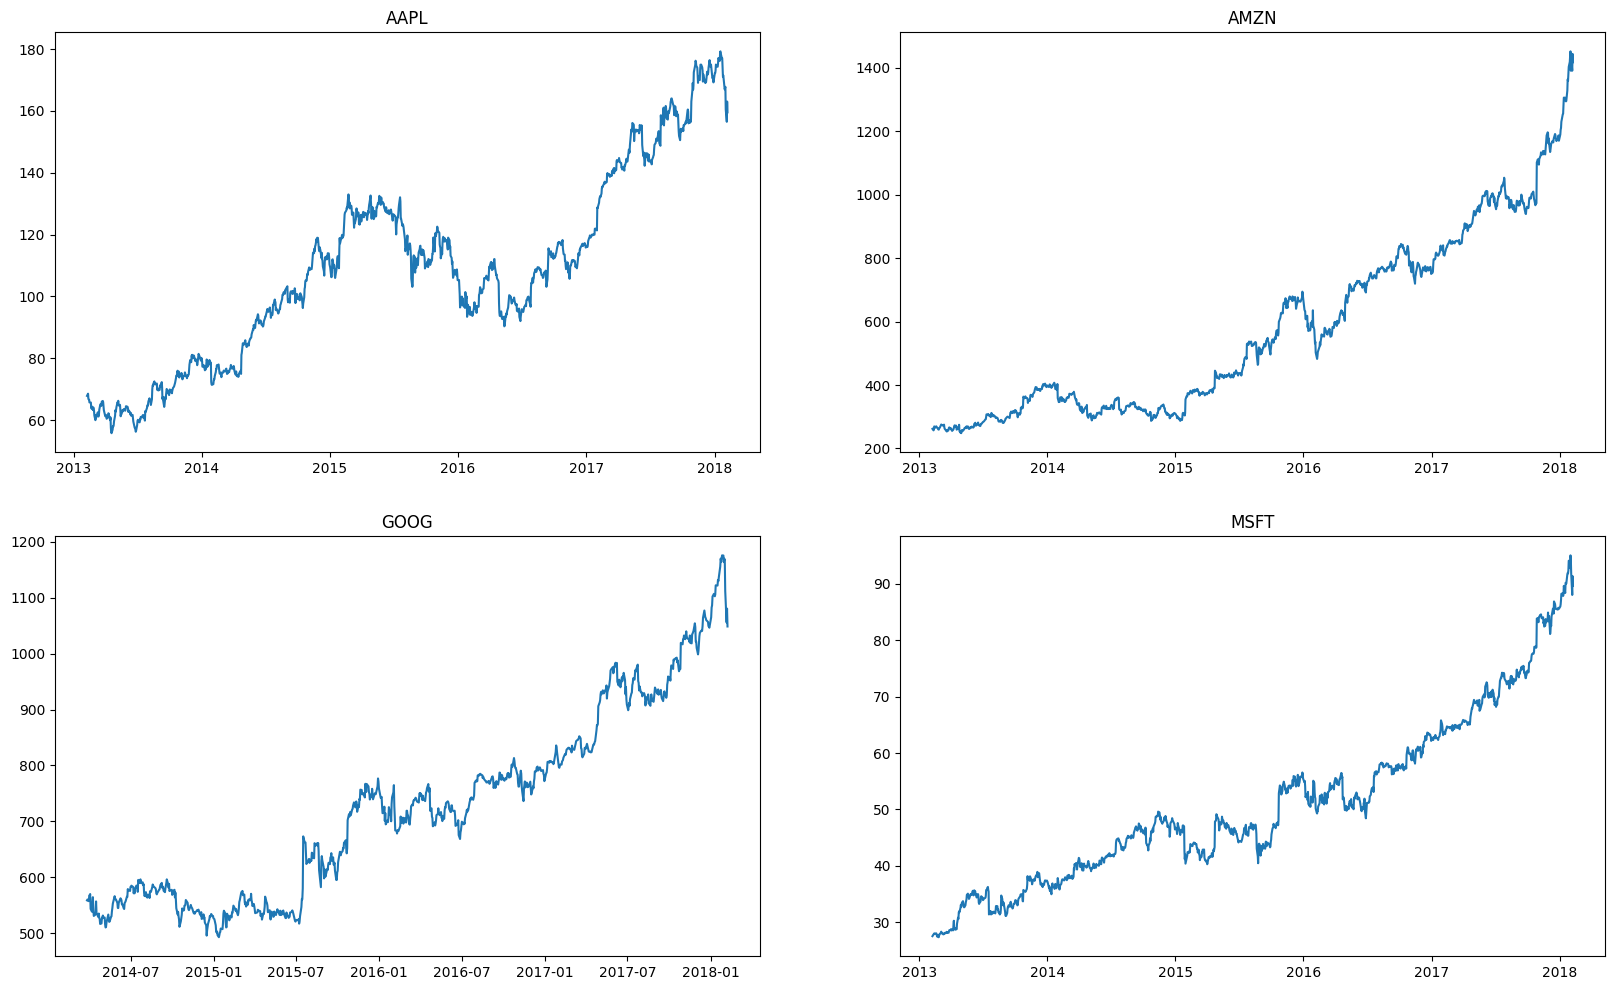

In [19]:
plt.figure(figsize=(20,12))

for index , company in enumerate(df_name_list , 1):
    plt.subplot(2 , 2 , index) # creating subplot for each stock
    f1 = df_data['Name']==company
    df = df_data[f1]
    plt.plot(df['date'] , df['close']) # plotting "date" vs "close"
    plt.title(company)

Calculating moving average of the stocks

In [21]:
df_data['close'].rolling(window= 10).mean().head(10)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9    66.03251
Name: close, dtype: float64

In [24]:
df_main = df_data.copy()  

In [26]:
# now considering different windows of rolling ,ie 10 days ,20 days ,50 days
df_day = [10, 20, 50]
for day in df_day:
    df_main['close_'+str(day)] = df_main['close'].rolling(day).mean()  

In [27]:
df_main.tail()

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
4747,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT,92.765,90.6770,86.9978
4748,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT,92.943,90.9105,87.1828
4749,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT,92.582,90.9010,87.2684
4750,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT,92.525,91.0535,87.4328
4751,2018-02-07,90.49,91.770,89.2000,89.61,41107592,MSFT,92.304,91.1230,87.5598


In [28]:
df_main.set_index('date', inplace=True)

In [29]:
df_main.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close_10',
       'close_20', 'close_50'],
      dtype='object')

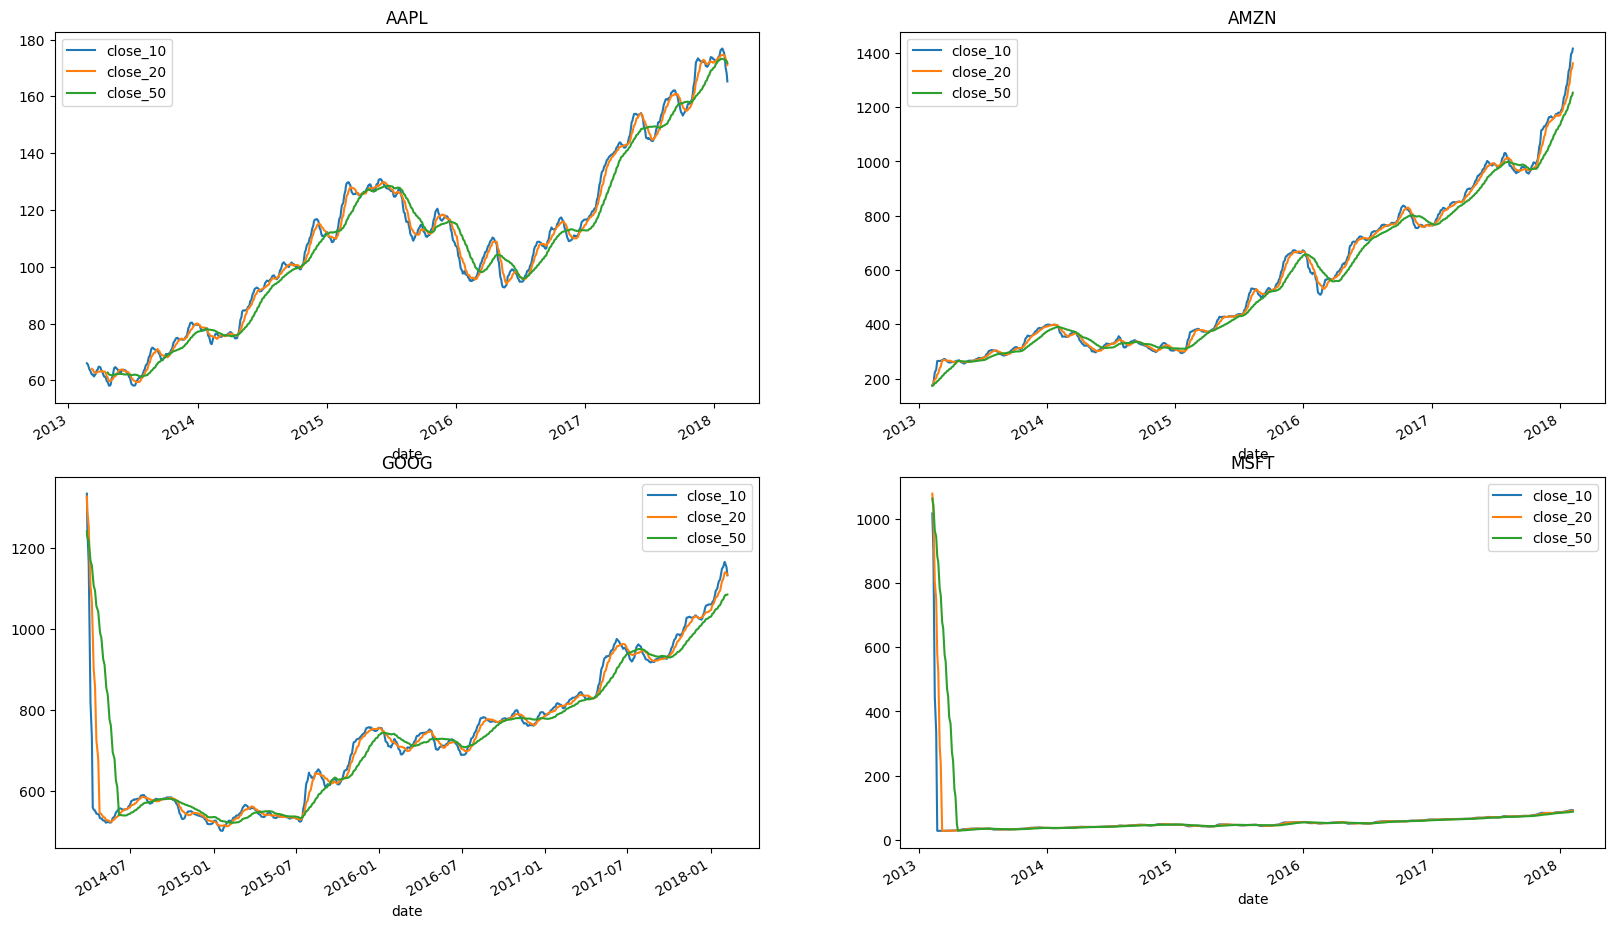

In [32]:
plt.figure(figsize=(20,12))

for index , company in enumerate(df_name_list , 1):
    plt.subplot(2 , 2 , index) # creating subplot for each stock
    df = df_main[df_main['Name']==company]
    df[['close_10', 'close_20', 'close_50']].plot(ax=plt.gca())
    plt.title(company)

Closing price change in  Apple stock

In [33]:
df_company_list

['/Users/viveksasidharan/code/Documents/GitHub/S%26P_resources/individual_stocks_5yr/AAPL_data.csv',
 '/Users/viveksasidharan/code/Documents/GitHub/S%26P_resources/individual_stocks_5yr/AMZN_data.csv',
 '/Users/viveksasidharan/code/Documents/GitHub/S%26P_resources/individual_stocks_5yr/GOOG_data.csv',
 '/Users/viveksasidharan/code/Documents/GitHub/S%26P_resources/individual_stocks_5yr/MSFT_data.csv']

In [34]:
df_apple = pd.read_csv(r'/Users/viveksasidharan/code/Documents/GitHub/S%26P_resources/individual_stocks_5yr/AAPL_data.csv')

In [35]:
df_apple.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [36]:
df_apple.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [37]:
df_apple['date'] = pd.to_datetime(df_apple['date'])

In [42]:
df_apple['daily_return_pct'] = df_apple['close'].pct_change()*100

In [43]:
df_apple.head()

,date,open,high,low,close,volume,Name,daily_return_pct
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [48]:
fig = px.line(df_apple, x='date', y='daily_return_pct', line_shape='linear')
fig.update_traces(line_color='magenta')  # Sets the color of the line to red
fig.show()

Resampling Analysis

In [49]:
df_apple.head()

,date,open,high,low,close,volume,Name,daily_return_pct
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [50]:
df_apple.dtypes

date                datetime64[ns]
open                       float64
high                       float64
low                        float64
close                      float64
volume                       int64
Name                        object
daily_return_pct           float64
dtype: object

In [52]:
df_apple.set_index('date', inplace=True)

In [ ]:
#a yearly('YE')  , 
#b quarterly('Q')   ,
#c monthly('ME') ,
#d weekly basis ('W'), 
#e Daily_basis('D')  
#f minutes ('3T') , 
#g 30 second bins('30S')   ,
#h resample('17min')

In [53]:
df_apple['close'].resample('M').mean()

/var/folders/sd/p2496nbx3yj38_rv6sfds6nr0000gn/T/ipykernel_13438/2095349585.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: ME, Name: close, Length: 61, dtype: float64

<Axes: xlabel='date'>

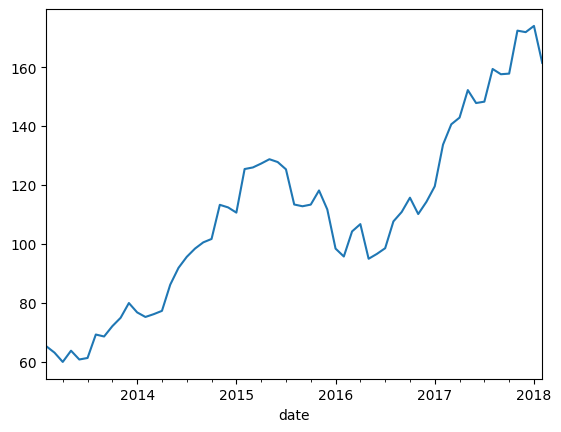

In [55]:
df_apple['close'].resample('ME').mean().plot()

<Axes: xlabel='date'>

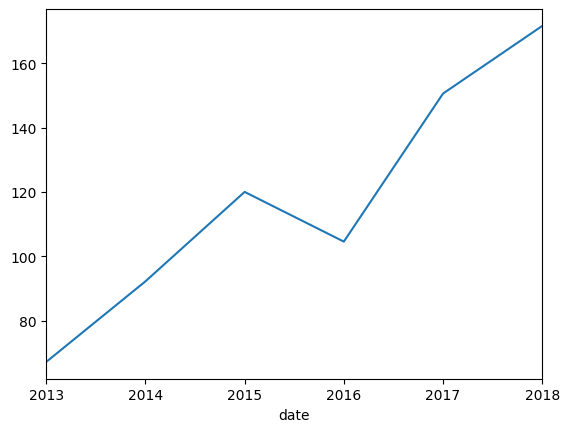

In [57]:
df_apple['close'].resample('YE').mean().plot()

<Axes: xlabel='date'>

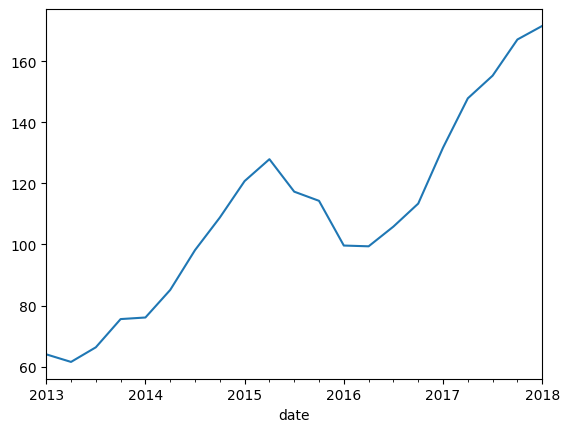

In [59]:
df_apple['close'].resample('QE').mean().plot()

Correlation on closing price of Apple, Amazon, Microsoft and Google

In [60]:
df_company_list

['/Users/viveksasidharan/code/Documents/GitHub/S%26P_resources/individual_stocks_5yr/AAPL_data.csv',
 '/Users/viveksasidharan/code/Documents/GitHub/S%26P_resources/individual_stocks_5yr/AMZN_data.csv',
 '/Users/viveksasidharan/code/Documents/GitHub/S%26P_resources/individual_stocks_5yr/GOOG_data.csv',
 '/Users/viveksasidharan/code/Documents/GitHub/S%26P_resources/individual_stocks_5yr/MSFT_data.csv']

In [108]:
df_app = pd.read_csv(df_company_list[0])
df_amz = pd.read_csv(df_company_list[1])
df_goog = pd.read_csv(df_company_list[2])
df_mcst = pd.read_csv(df_company_list[3])

In [109]:
df_app.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [110]:
df_goog.head()

,date,open,high,low,close,volume,Name
0,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG
1,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG
2,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG
3,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG
4,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG


In [111]:
df_close = pd.DataFrame()
df_close['apple_close']= df_app['close']
df_close['google_close']= df_goog['close']
df_close['amazon_close']= df_amz['close']
df_close['microsoft_close']= df_mcst['close']

In [112]:
df_close.head()

,apple_close,google_close,amazon_close,microsoft_close
0,67.8542,558.46,261.95,27.55
1,68.5614,559.99,257.21,27.86
2,66.8428,556.97,258.70,27.88
3,66.7156,567.16,269.47,28.03
4,66.6556,567.00,269.24,28.04


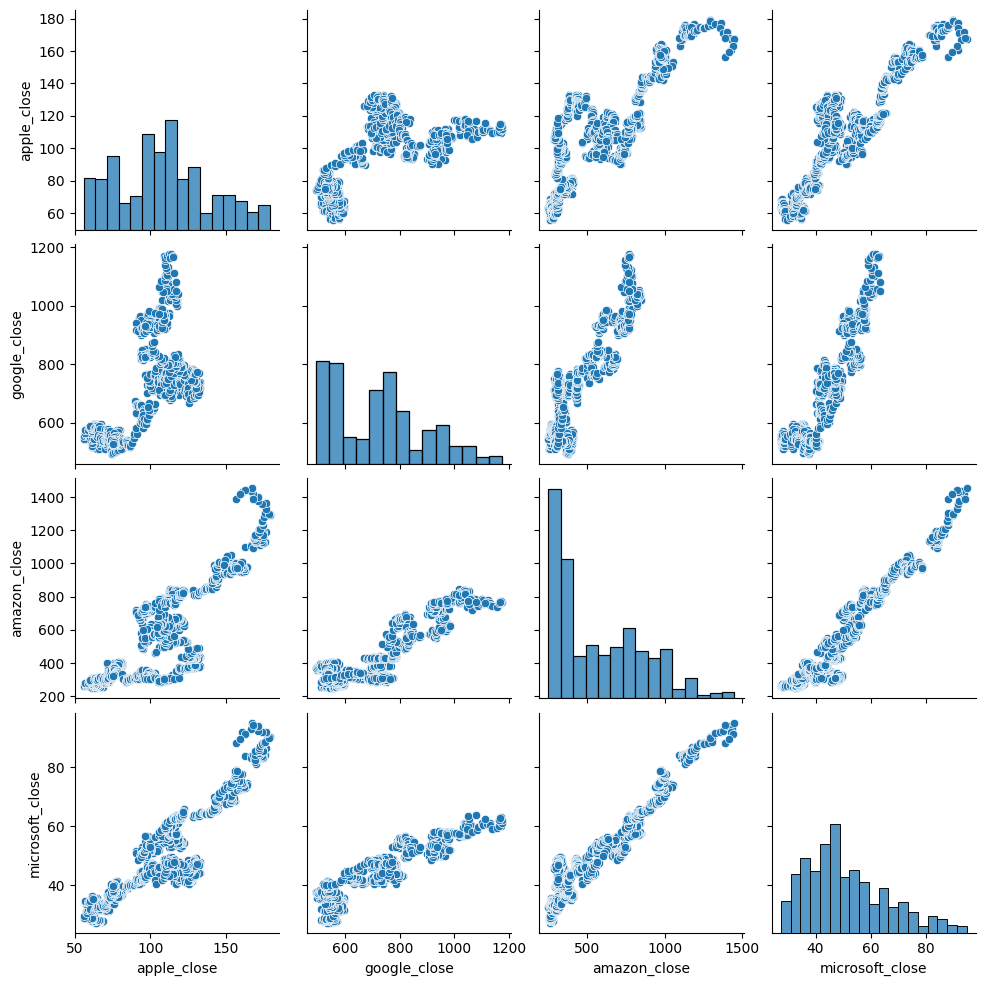

In [113]:
sns.pairplot(df_close)

In [114]:
df_close.corr()

,apple_close,google_close,amazon_close,microsoft_close
apple_close,1.000000,0.640522,0.819078,0.899689
google_close,0.640522,1.000000,0.888456,0.907011
amazon_close,0.819078,0.888456,1.000000,0.955977
microsoft_close,0.899689,0.907011,0.955977,1.000000


<Axes: >

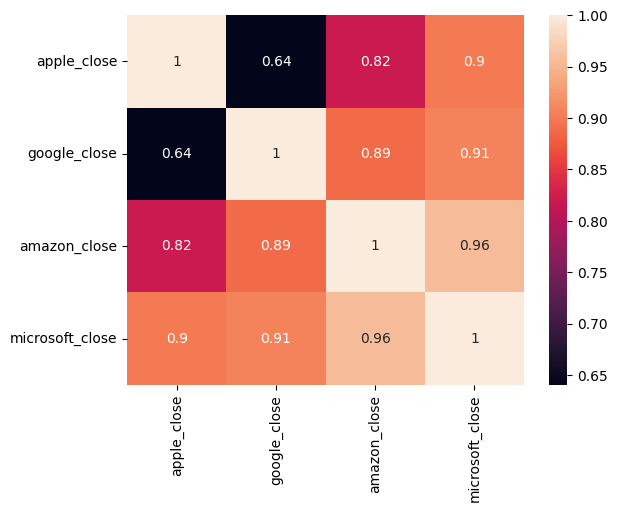

In [116]:
sns.heatmap(df_close.corr(), annot=True)

Daily change in Closing price of stocks or Daily Returns in Stock are co-related or not

In [117]:
df_close.head()

,apple_close,google_close,amazon_close,microsoft_close
0,67.8542,558.46,261.95,27.55
1,68.5614,559.99,257.21,27.86
2,66.8428,556.97,258.70,27.88
3,66.7156,567.16,269.47,28.03
4,66.6556,567.00,269.24,28.04


In [118]:
df_close.columns

Index(['apple_close', 'google_close', 'amazon_close', 'microsoft_close'], dtype='object')

In [120]:
df_list = ['apple_close', 'google_close', 'amazon_close', 'microsoft_close']

In [121]:
for cmp in df_list:
    df_close[cmp+'_pct'] = df_close[cmp].pct_change()*100

/var/folders/sd/p2496nbx3yj38_rv6sfds6nr0000gn/T/ipykernel_13438/2415901559.py:2: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



In [122]:
df_close.head()

,apple_close,google_close,amazon_close,microsoft_close,apple_close_pct,google_close_pct,amazon_close_pct,microsoft_close_pct
0,67.8542,558.46,261.95,27.55,NaN,NaN,NaN,NaN
1,68.5614,559.99,257.21,27.86,1.042235,0.273968,-1.809506,1.125227
2,66.8428,556.97,258.70,27.88,-2.506658,-0.539295,0.579293,0.071788
3,66.7156,567.16,269.47,28.03,-0.190297,1.829542,4.163123,0.538020
4,66.6556,567.00,269.24,28.04,-0.089934,-0.028211,-0.085353,0.035676


In [123]:
df_close.columns

Index(['apple_close', 'google_close', 'amazon_close', 'microsoft_close',
       'apple_close_pct', 'google_close_pct', 'amazon_close_pct',
       'microsoft_close_pct'],
      dtype='object')

In [124]:
df_close_pct = df_close[['apple_close_pct', 'google_close_pct', 'amazon_close_pct', 'microsoft_close_pct']]

In [125]:
df_close_pct

,apple_close_pct,google_close_pct,amazon_close_pct,microsoft_close_pct
0,NaN,NaN,NaN,NaN
1,1.042235,0.273968,-1.809506,1.125227
2,-2.506658,-0.539295,0.579293,0.071788
3,-0.190297,1.829542,4.163123,0.538020
4,-0.089934,-0.028211,-0.085353,0.035676
...,...,...,...,...
1254,0.209043,0.000000,-4.196734,-0.789391
1255,-4.339015,0.000000,2.874101,-2.631021
1256,-2.498442,0.000000,-2.793804,-4.118544
1257,4.179181,0.000000,3.801439,3.784091


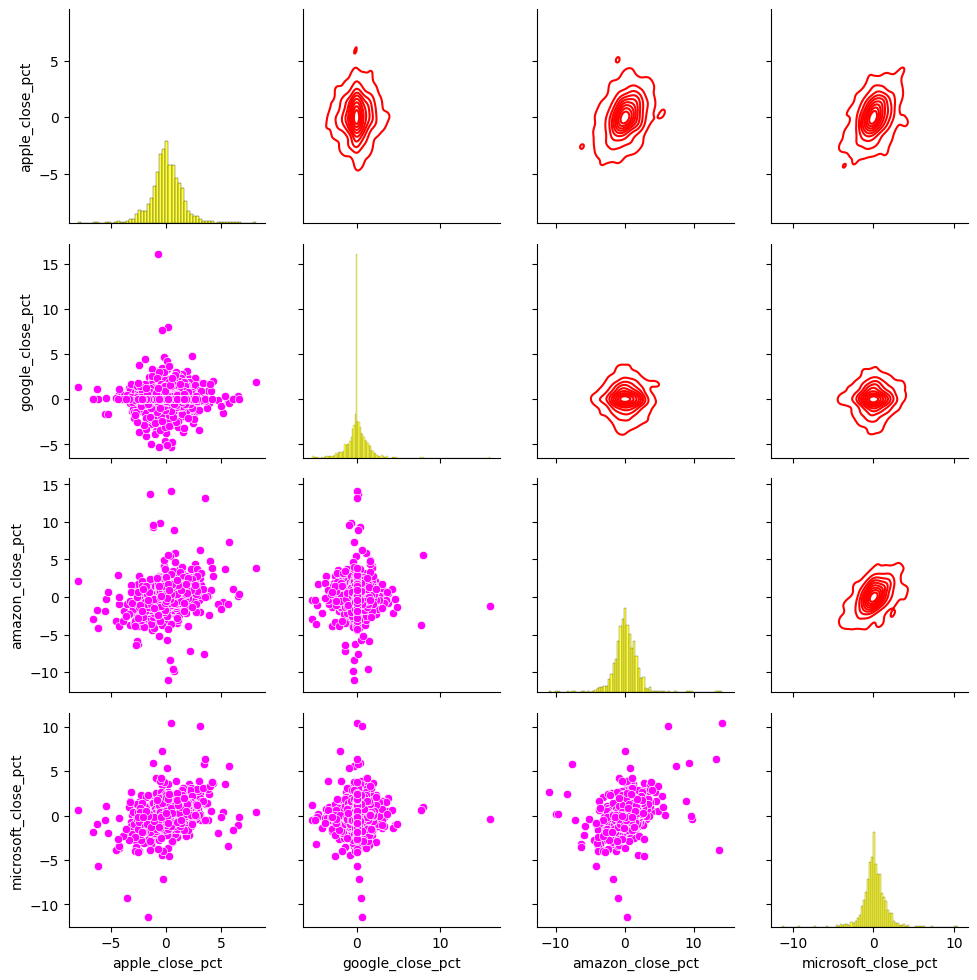

In [132]:
fig = sns.PairGrid(data= df_close_pct)
fig.map_diag(sns.histplot, color='yellow')
fig.map_lower(sns.scatterplot, color='magenta')
fig.map_upper(sns.kdeplot, color='red')

In [127]:
df_close_pct.corr()

,apple_close_pct,google_close_pct,amazon_close_pct,microsoft_close_pct
apple_close_pct,1.000000,0.032996,0.287659,0.366598
google_close_pct,0.032996,1.000000,0.025323,0.036436
amazon_close_pct,0.287659,0.025323,1.000000,0.402678
microsoft_close_pct,0.366598,0.036436,0.402678,1.000000


In [ ]:
#Conclusion :
#While Comparing 'apple_pct' to 'amz_pct', it shows a linear relationship upto some extent.